# Analyzing Seattle Airbnb Data
![AIRBNB Seattle](http://u.realgeeks.media/stevekennedy/old_wp/_wp-content_uploads_2017_01_AirbnbSeattle470x246.jpg)

In this journey, we will *briefly* analyze [Seattle Airbnb Open Data](https://www.kaggle.com/datasets/airbnb/seattle) while adhering to the **Cr**oss **I**ndustry **S**tandard **P**rocess for **D**ata **M**ining (*CRISP-DM*) below:

![CRISP-DM Process](http://optimumsportsperformance.com/blog/wp-content/uploads/2019/12/Screen-Shot-2019-12-14-at-10.12.35-PM-768x423.png)

*- Image provided courtesy of [Patrick Ward, Ph.D.](http://optimumsportsperformance.com/blog/data-analysis-template-in-r-markdown-jupyter-notebook/).*
## 1) 👨‍💼🤝👨‍💼Business Understanding
Since its inception in August 2008, Airbnb has connected guests and hosts by offering homestays and experiences. Although many individuals would agree that Airbnb has seized fractional market share from a handful of lodgings, it has successfully grown into an exceptional service used and trusted worldwide. Thus, the company has vast reservation data at its fingertips.

By analyzing this data, one may deduce essential business insights such as the following: seasonality tendencies, which areas are in low/high demand, which feature(s) of a rental unit appear to impact price most, understanding client (host and guest) behavior through ratings or textual reviews, and many more.

To that extent, this project will answer the following three useful, but common, business questions:
- What are some seasonality trends that are confirmed by the data?  *(Clean the data and plot relatable features with respect to time)*
- Where are the most popular areas in Seattle by volume?  *(Plot area rental frequency)*
- Which features tend to have the most impact on price?  *(Create a simple Machine Learning model and interpret its accuracy/usefulness)*

## 2) 🤔👨‍💻 Data Understanding
The [dataset(s)](https://www.kaggle.com/datasets/airbnb/seattle) contain Seattle Airbnb data for one year (01/2016 - 01/2017). Altogether, there are 3 datasets: 
- **listings.csv**, includes complete descriptions and average review score
- **calendar.csv**, includes listing id and the price and availability for that day
- **reviews.csv**, includes a unique id for each reviewer and detailed comments 

Of these 3 datasets, the first 2 will be leveraged to answer the above business questions.


**However, before analyzing the data, one must try and understand it because it will prove helpful in preparing it for analysis.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import seaborn as sns
import missingno as msno
# %pprint --turns pretty print on/off
pd.set_option('display.max_columns', None)
import folium
from folium.plugins import HeatMap

listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')

listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [4]:
print("The listings.csv file contains {:,} rows and {} columns. More importantly, it contains {:,} listings and {:,} hosts.".format(listings.shape[0], 
                                                                                                                                    listings.shape[1],
                                                                                                                                    listings['id'].count(),
                                                                                                                                    len(listings['host_id'].unique())))

The listings.csv file contains 3,818 rows and 92 columns. More importantly, it contains 3,818 listings and 2,751 hosts.


Now that we have viewed a portion of the data and know its dimensions, it would prove useful to determine how much of the data is actually available (NOT NULL) and which columns are useful for our analysis and/or require cleaning.

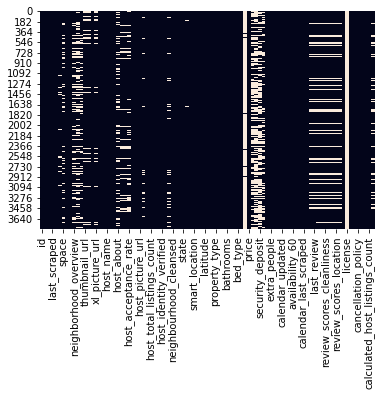

In [5]:
sns.heatmap(listings.isnull(), cbar=False);

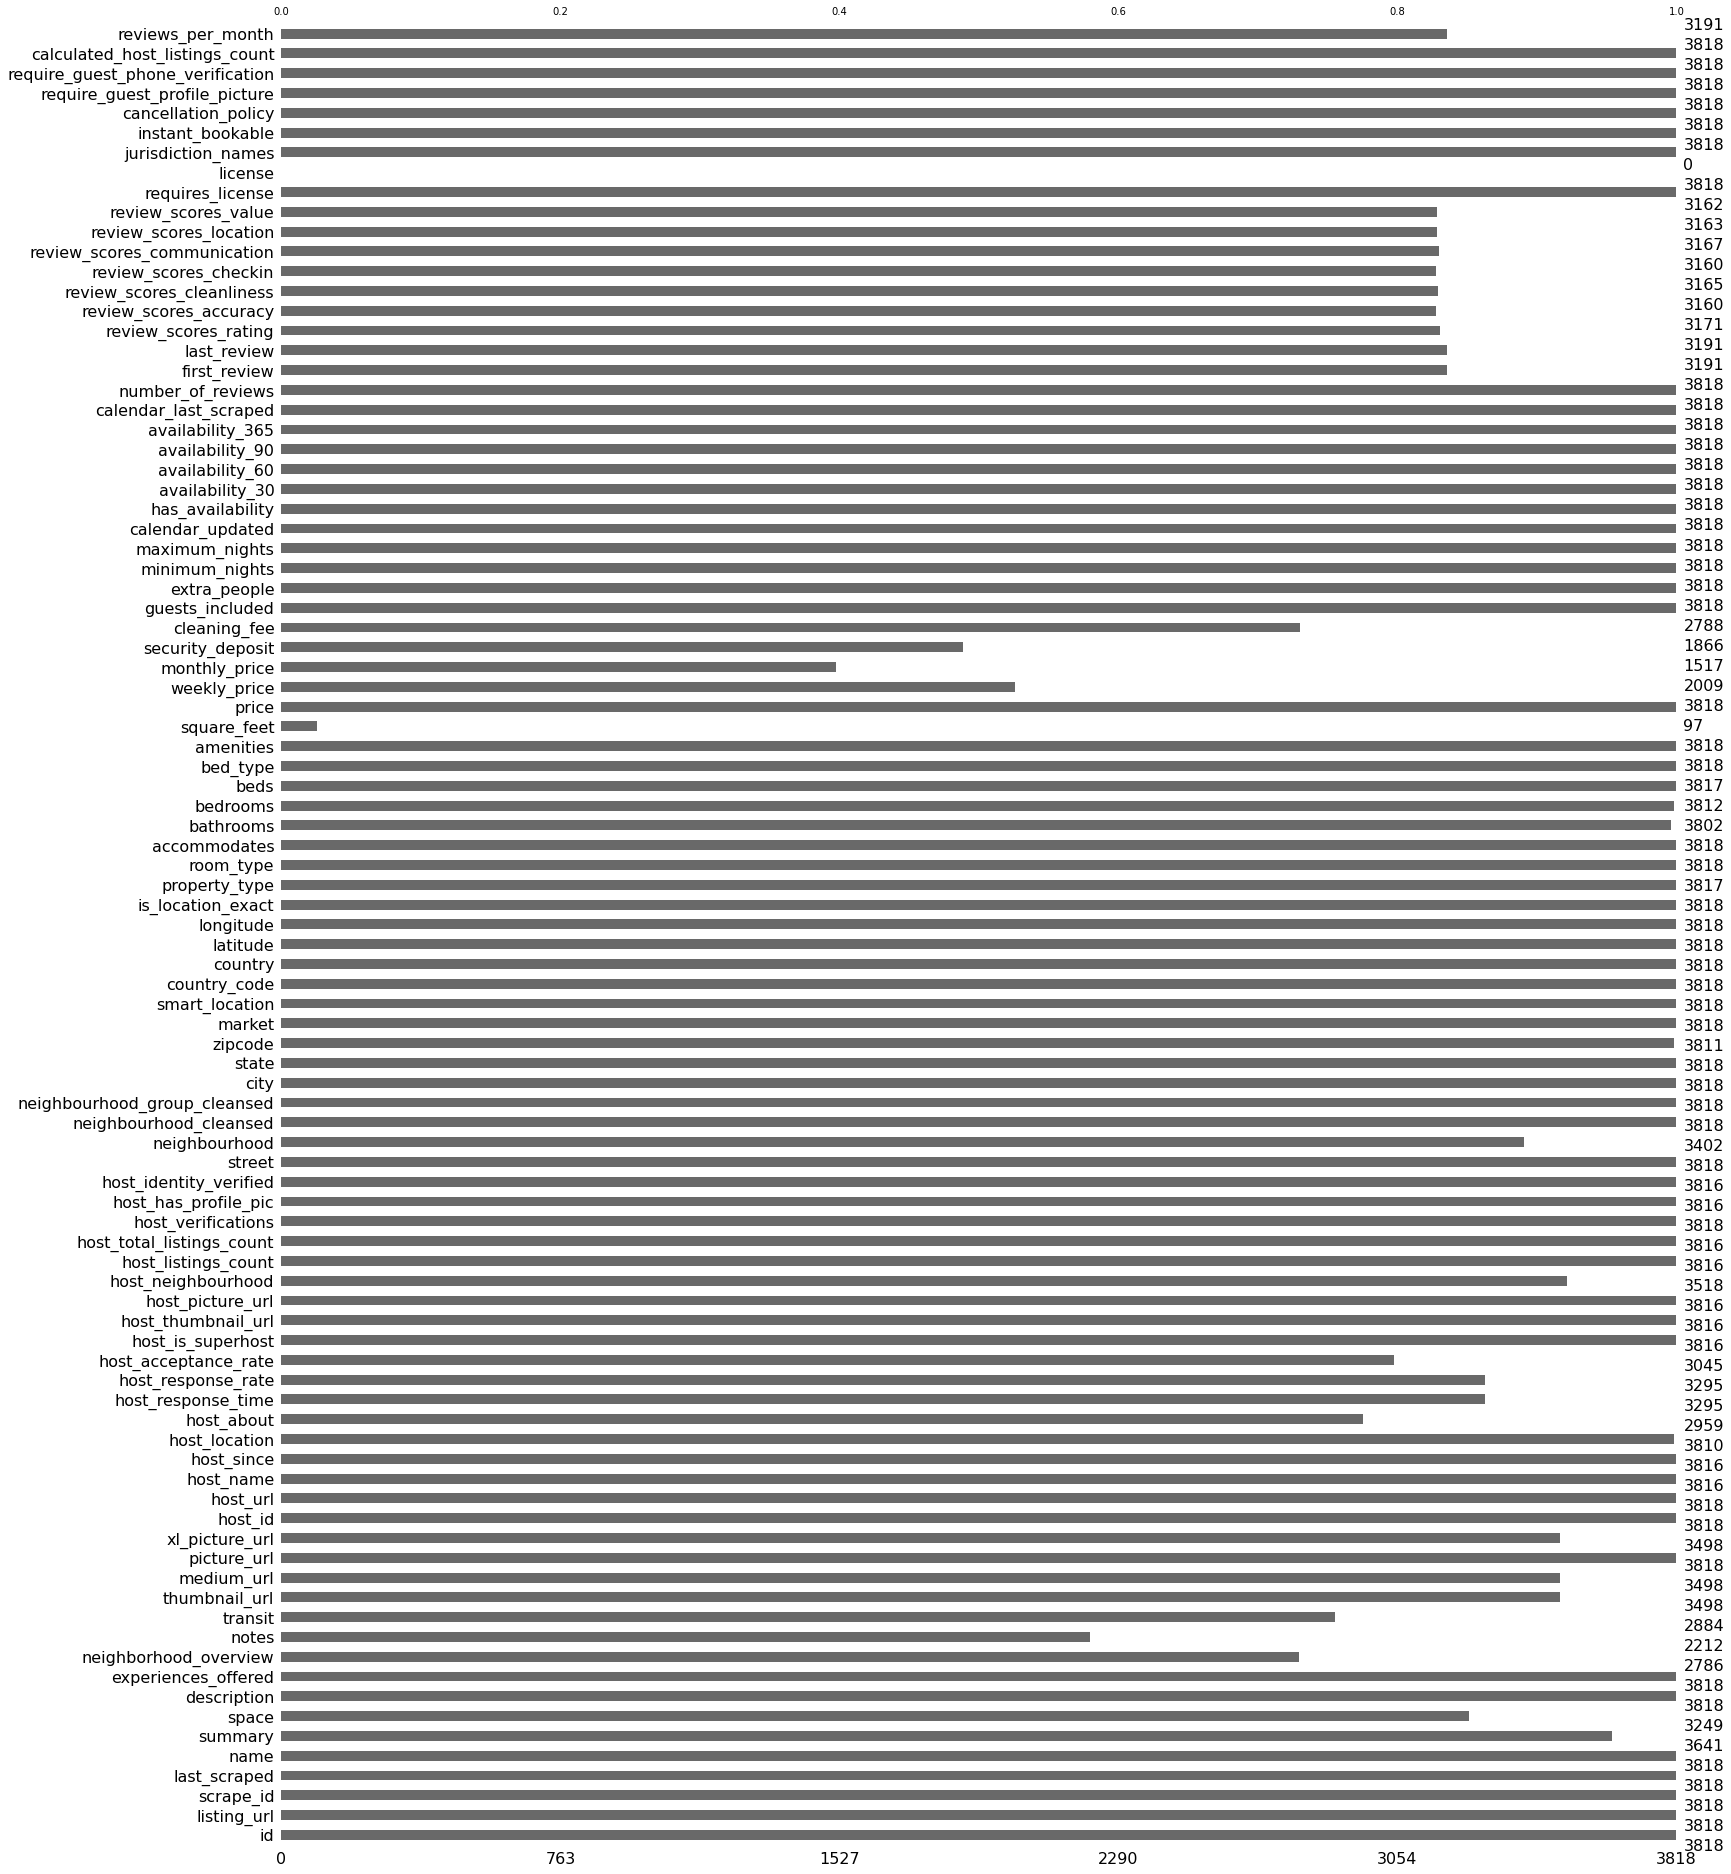

In [6]:
msno.bar(listings);

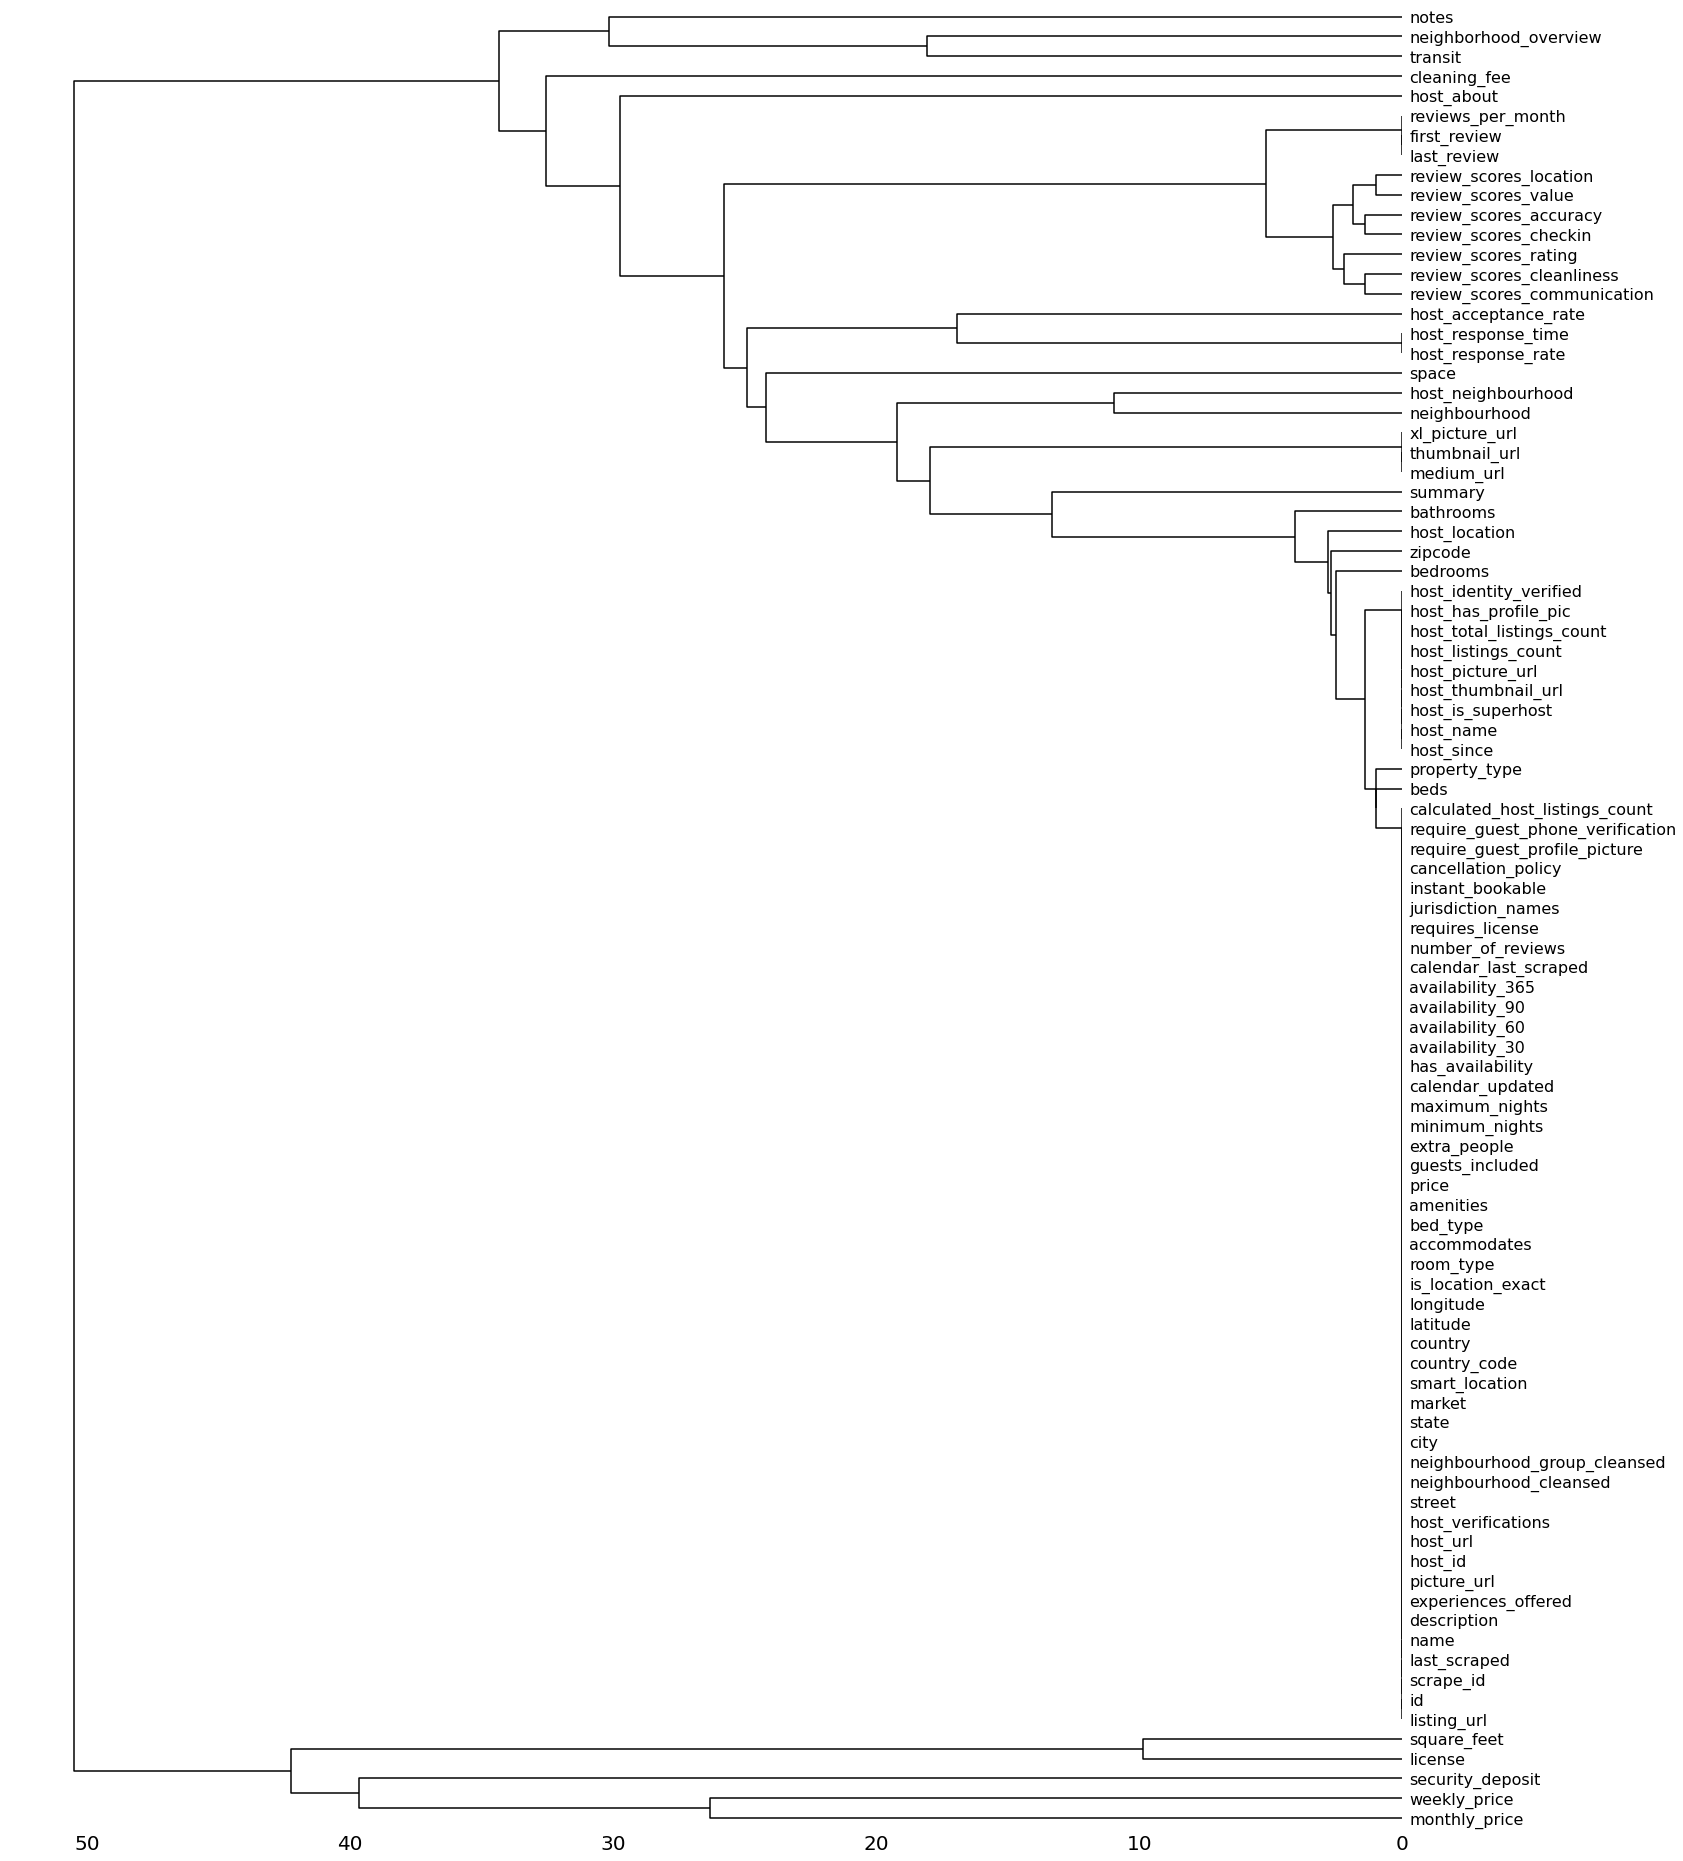

In [7]:
msno.dendrogram(listings);

In [8]:
print("The calendar.csv file contains {:,} rows and {} columns.".format(calendar.shape[0],
                                                                        calendar.shape[1]))

The calendar.csv file contains 1,393,570 rows and 4 columns.


In [14]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [10]:
sum(calendar.price.isnull())

459028

In [15]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


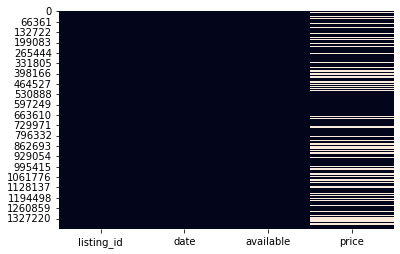

In [16]:
sns.heatmap(calendar.isnull(), cbar=False);

In [13]:
print("Appriximately {}% of Price data is missing".format(round(100* sum(calendar.price.isnull()) / calendar.shape[0], 2)))

Appriximately 32.94% of Price data is missing


### Data Understanding Takeaway

Through the brief overview of the data we noticed the following:

### Listings:
- The listings.csv file contains 3,818 rows and 92 columns. More importantly, it includes 3,818 listings and 2,751 hosts.
- There are numerous columns with an abundant amount of missing values
- Having missing values in specific columns is correlated with having missing values in other columns (this was accomplished through the "missingno" library, a rarely used but relatively simple implementation: <msno.dendogram(dataframe)>)
- Columns require **Data Manipulation**:
    - Certain columns need to be converted from string to numeric
    - Certain NULL values require imputation
    - "Meaningless" columns can be dropped: square feet (many missing values), listing_url, scrape_id, last_scraped, etc. because a) they are meaningless for our analysis, and b) they will increase processing speed. Thus, we can keep relevant features for our analysis: 'price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'weekly_price', 'monthly_price', 'cleaning_fee', 'instant_bookable', 'reviews_per_month', 'cancellation_policy', etc.

### Calendar:
- The calendar.csv file contains 1,393,570 rows and 4 columns.
- ~33% of "Price" column data is NULL
- Columns require Data Manipulation:
    - "Price" should be converted to float
    - "Listing_id" should also be converted to float
    - Dates should be extracted from "date" column

# 3) 🧹 Data Preparation
Before conducting the analysis, we must prepare the data by cleaning it. Therefore, to accomplish this:
- "Meaningless" columns will be dropped
- A portion of the missing data will be imputed
- Certain feature data types will be changed

In [14]:
def data_preperation(listings_df, calendar_df):
    """
    This function cleans the 'calendar' and 'listings' dataframes and prepares them for analysis

    """
    
    calendar['price'] = calendar['price'].str.replace('$','').str.replace(',','').astype(float)
    
    # Merge the two dataframes
    df = pd.merge(listings, calendar, left_on='id', right_on='listing_id')
    
    # Performing some basic house cleaning:
    df['month']            = pd.DatetimeIndex(df['date']).month
    df['year']             = pd.DatetimeIndex(df['date']).year
    df['host_since_year']  = pd.DatetimeIndex(df['host_since']).year
    df['host_since_year'].fillna(df['host_since_year'].median(), inplace=True)
    df.dropna(subset=['price_y'], inplace=True) # we will be using the calendar price data as our target variable in ML
    df.rename({'price_y':'price'}, axis=1, inplace=True)    
    
    # Drop columns that will not be used in analysis
    # Note: we do this to simplify our work. Meaning, improved processing speed, less cleaning, etc.
    cols_to_drop = ['host_since','price_x','date','id','listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
                    'space', 'description', 'experiences_offered', 'neighborhood_overview',
                    'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                    'xl_picture_url','host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url',
                    'city', 'state','market', 'available', 'host_id', 'host_location', 'host_acceptance_rate', 
                    'host_neighbourhood', 'host_total_listings_count', 'weekly_price', 'monthly_price', 
                    'security_deposit', 'cleaning_fee', 'calendar_updated', 'street', 'neighbourhood', 
                    'neighbourhood_cleansed', 'zipcode', 'host_about', 'smart_location', 'country_code', 
                    'country', 'latitude', 'longitude', 'is_location_exact', 'square_feet', 'has_availability', 
                    'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 
                    'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'reviews_per_month']
    
    df.drop(columns=cols_to_drop, inplace=True)
    df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)
    df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace=True)
    # In qcut, when we specify q=5, we are telling pandas to cut the Year column into 5 equal quantiles, i.e. 0-20%, 20-40%, 40-60%, 60-80% and 80-100% buckets/bins. --https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/
    df['host_response_rate_quantiles'] = pd.qcut(df['host_response_rate'], q=5, labels=False, duplicates='drop')
    df['extra_ppl_extra_fee'] = np.where(df['extra_people'] == '$0.00', 0, 1)
    df.drop(columns='extra_people', inplace=True)
    df['host_listings_count'].fillna(df['host_listings_count'].median(), inplace=True)
    
    for col in df.columns:
        if 'review_scores' in col:
            df[col].fillna(df[col].median(), inplace=True)
    
    df['beds'].fillna(df['beds'].median(), inplace=True)
    df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
    df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
    
    
    return df

df = data_preperation(listings,calendar)

/var/folders/g8/ftb972_16dsfxly5vlrdvz8h0000gn/T/ipykernel_88065/21829706.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['price'] = calendar['price'].str.replace('$','').str.replace(',','').astype(float)


In [15]:
df.isna().sum()

host_response_time                  108514
host_response_rate                       0
host_is_superhost                       92
host_listings_count                      0
host_verifications                       0
host_has_profile_pic                    92
host_identity_verified                  92
neighbourhood_group_cleansed             0
property_type                          309
room_type                                0
accommodates                             0
bathrooms                                0
bedrooms                                 0
beds                                     0
bed_type                                 0
amenities                                0
guests_included                          0
minimum_nights                           0
maximum_nights                           0
number_of_reviews                        0
review_scores_rating                     0
review_scores_accuracy                   0
review_scores_cleanliness                0
review_scor

# 4) 🤖 Modeling
Before we begin, it would be helpful to gain a macro perspective on the following: 
- Visualizing where rental properties are located geographically (perhaps some knowledge outside the scope of the dataset may prove helpful in future analysis, ex: Amazon's real estate venture(s), properties by certain coasts/tourist sites/restaurants have low/high demand etc.)
- Insight into our target variable, price (distribution, etc.)
- Feature Correlation with the target variable, price
- Machine Learning (Random Forest model implementation + Feature importance)

In [16]:
import folium
from folium.plugins import HeatMap
m = folium.Map([47.6062,-122.3321],zoom_start=11)

HeatMap(listings[['latitude','longitude']].dropna(),radius=8, gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
folium.Circle(radius=14550,
            location=[47.6062,-122.3321],
            color='crimson',
            fill=False,).add_to(m)
folium.Marker(location=[47.6062,-122.3321], popup =  'Seattle').add_to(m)

display(m)

- Seasonality trends depict a monotonic increase in average rental price by month from January to July, followed by a gradual decline until November and a small uptick to December

- The increased average price between summer months may be attributed to less listing availability. Therefore, **there is an inverse relationship between price and availability concerning seasonality due to market saturation.**

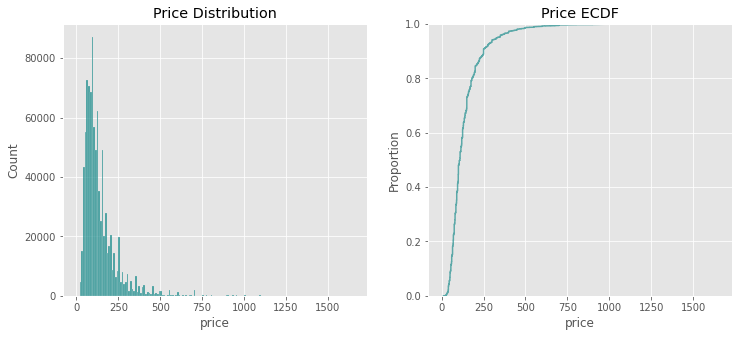

In [17]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12,5))
sns.histplot(data=df, x='price', binrange=(0,1600), binwidth=10, color='teal', alpha=0.7, ax=axes[0])
sns.ecdfplot(data=df, x='price', color='teal', alpha=0.6, ax=axes[1])
axes[0].set_title('Price Distribution');
axes[1].set_title('Price ECDF');
plt.savefig('Price Macro.png')

In [18]:
print('Minimum price per listing: ${:,}\nMaximum price per listing: ${:,}\nAverage price per listing: ${:,}\nMedian price per listing : ${:,}'.format(df['price'].min(), 
                                                                                                                                                      df['price'].max(), 
                                                                                                                                                      round(df['price'].mean(),2),  
                                                                                                                                                      df['price'].median()))

Minimum price per listing: $10.0
Maximum price per listing: $1,650.0
Average price per listing: $137.94
Median price per listing : $109.0


- The distribution of the target variable (price) is right-skewed, with approximately ~90% of the AirBNB rental units being less than ≤$250.

- Minimum price per listing: $10.0 **|** Maximum price per listing: $1,650.0 **|** Average price per listing: $137.94 **|** Median price per listing : $109.0

- The minimum price listing of $10.0 seems a little too low (it might be worth exploring data validation on this instance as well as neighboring samples)

- Listings are spread out throughout Seattle. However, most of the listing volumes appear to be centralized near Belltown, First Hill, Capitol Hill, Madison Valley, and Central District.

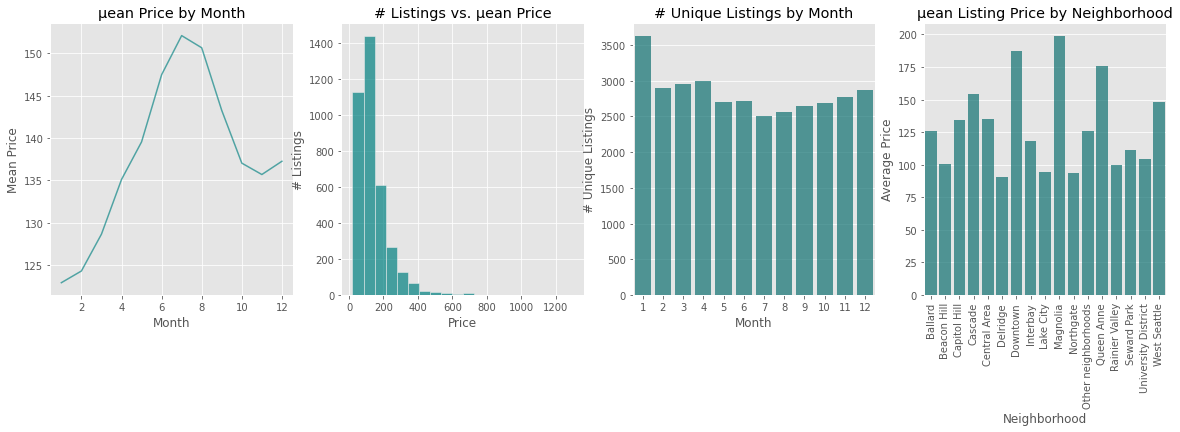

In [19]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 4, figsize=(20,5))


sns.lineplot(data=df.groupby('month')['price'].mean(), color='teal', alpha=0.65, ax=axes[0])
axes[0].set_title('µean Price by Month');
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Mean Price');


sns.histplot(data=df.groupby('listing_id')['price'].mean(), stat='count', bins=20, color='teal', alpha=0.7, ax=axes[1])
axes[1].set_title('# Listings vs. µean Price');
axes[1].set_xlabel('Price')
axes[1].set_ylabel('# Listings');


pivot_1 = pd.pivot_table(df,index='month', values=['listing_id'], aggfunc={'listing_id':'nunique'})
pivot_1['month'] = pivot_1.index
sns.barplot(data=pivot_1, x='month', y='listing_id', color='teal', alpha=0.7, ax=axes[2]);
axes[2].set_title('# Unique Listings by Month');
axes[2].set_xlabel('Month')
axes[2].set_ylabel('# Unique Listings');


pivot_2 = pd.pivot_table(df,index='neighbourhood_group_cleansed', values=['price'], aggfunc={'price':np.mean})
pivot_2['neighbourhood_group_cleansed'] = pivot_2.index
sns.barplot(data=pivot_2, x='neighbourhood_group_cleansed', y='price', color='teal', alpha=0.7, ax=axes[3])
plt.xticks(rotation=90);
axes[3].set_title('µean Listing Price by Neighborhood');
axes[3].set_xlabel('Neighborhood')
axes[3].set_ylabel('Average Price');

- Seasonality trends depict a monotonic increase in average rental price by month from January to July, followed by a gradual decline until November and a small uptick to December

- The increased average price between summer months may be attributed to less listing availability. Therefore, **there is an inverse relationship between price and availability concerning seasonality due to market saturation.**

- When uniquely grouping listings, the average price of most listings is **$50≤ $listingµ ≤$250**, making it affordable for most tourists.

- On average, Downtown, Magnolia, and Queen Anne tend to be the priciest neighborhoods with a mean listing price of **$175<**

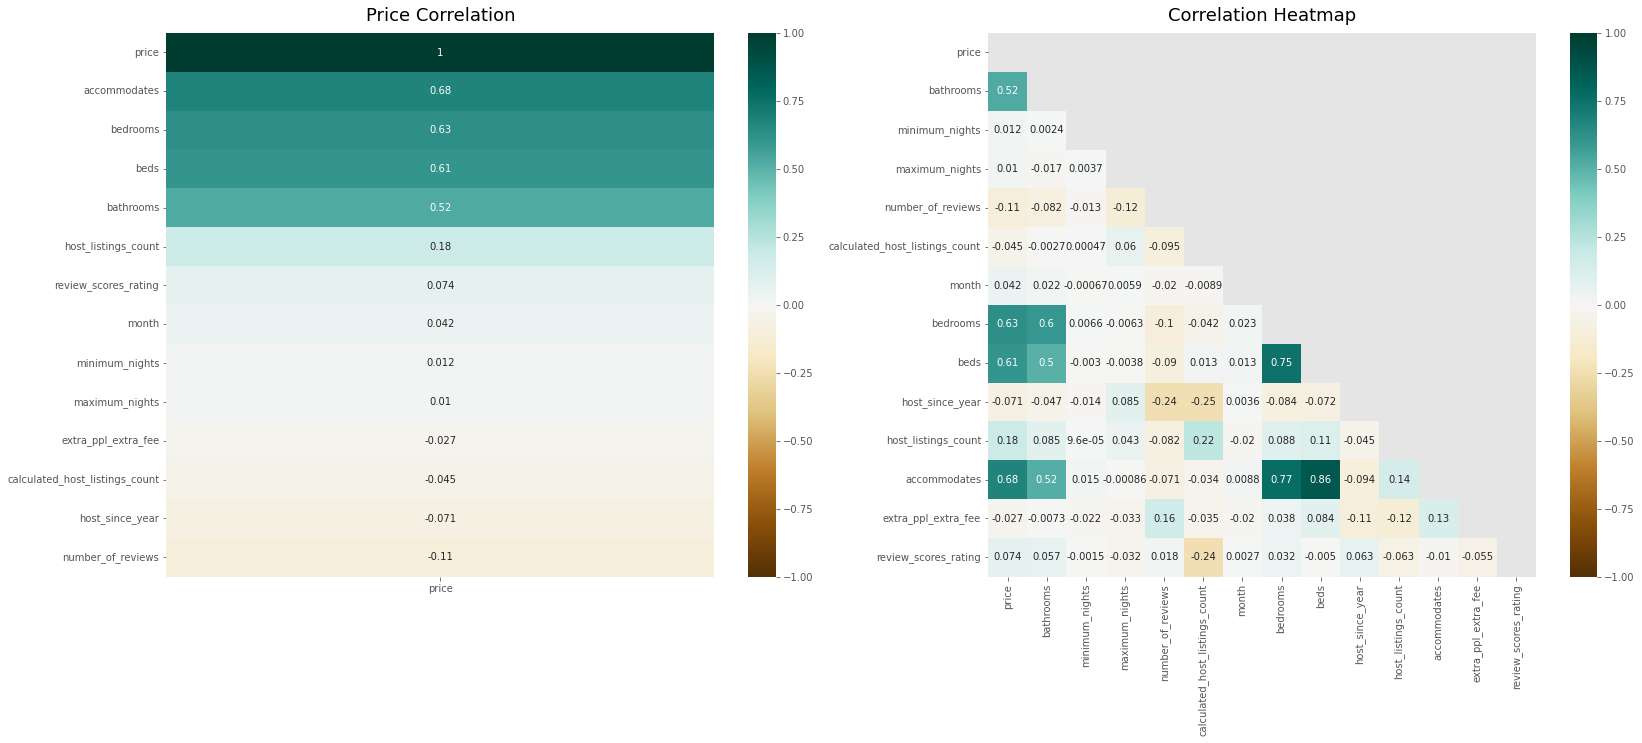

In [21]:
cols = ['price',
        'bathrooms',
        'minimum_nights',
        'maximum_nights',
        'number_of_reviews',
        'calculated_host_listings_count',
        'month',
        'bedrooms',
        'beds',
        'host_since_year',
        'host_listings_count', 
        'accommodates',
        'extra_ppl_extra_fee',
        'review_scores_rating']

plt.style.use('ggplot')
fig, axes = plt.subplots(1, 2, figsize=(27,10))

sns.heatmap(df[cols].corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=axes[0]);
axes[0].set_title('Price Correlation',fontdict={'fontsize':18}, pad=12)

mask = np.triu(np.ones_like(df[cols].corr(), dtype=bool))
sns.heatmap(data=df[cols].corr(), mask=mask,vmin=-1, vmax=1, annot=True,cmap='BrBG',ax=axes[1])
axes[1].set_title('Correlation Heatmap',fontdict={'fontsize':18}, pad=12);

The above correlation plots depict that price is most positively correlated with the following features:
- Accommodations 68%
- Bedrooms 63%
- Beds 61% (although this one may be somewhat synonymous since more bedrooms imply more beds, generally speaking)
- Bathrooms 52%
- Broadly speaking, it seems somewhat rather evident that these features are most positively correlated with price because *generally*:
    -  `more square feet => more bedrooms => more beds => more people => greater $.`


## Machine Learning 🤖🤖
Now, comes a more interesting component of the analysis: finding out feature influence on the target variable, price. 🤔

To accomplish this, Random Forest will be leveraged to assess the root-mean-squared-error (RMSE) and R^2 along with feature importance.

However, before model implemention, all of the data *must* be numeric. So, let's get that out of the way first.

In [22]:
df.drop(columns=['amenities','host_verifications','listing_id','year'], inplace=True)
df2 = df.copy()
df2.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price,month,host_since_year,host_response_rate_quantiles,extra_ppl_extra_fee
0,within a few hours,96.0,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,85.0,1,2011.0,1,1
1,within a few hours,96.0,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,85.0,1,2011.0,1,1
9,within a few hours,96.0,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,85.0,1,2011.0,1,1
10,within a few hours,96.0,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,85.0,1,2011.0,1,1
14,within a few hours,96.0,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,85.0,1,2011.0,1,1


In [23]:
categorical_columns = list(df.select_dtypes(include=['object']).columns)

for col in categorical_columns:
    df2 = pd.concat([df2.drop(col, axis=1), 
                    pd.get_dummies(df[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=True)], 
                    axis=1)
    
df2.head()

,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,price,month,host_since_year,host_response_rate_quantiles,extra_ppl_extra_fee,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_t,host_identity_verified_nan,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_group_cleansed_nan,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,property_type_nan,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,96.0,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,85.0,1,2011.0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,96.0,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,85.0,1,2011.0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
9,96.0,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,85.0,1,2011.0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
10,96.0,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,85.0,1,2011.0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
14,96.0,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,85.0,1,2011.0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error , r2_score

X = df2.drop(columns = 'price')
y = df2[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

# Instantiate and train the model:
rf = RandomForestRegressor(criterion='squared_error',
                           random_state=123,
                           n_jobs=-1)

# fit model
rf.fit(X_train, np.ravel(y_train)) # y_train.values.ravel() also works

# predictions
y_train_preds = rf.predict(X_train)
y_test_preds = rf.predict(X_test)

In [32]:
# scores
from math import sqrt
print('Random Forest RMSE train: {:.2f}, test: {:.2f}'.format(sqrt(mean_squared_error(y_train, y_train_preds)),
                                                              sqrt(mean_squared_error(y_test, y_test_preds))))

print('Random Forest R^2 train: {:.2f}, test: {:.2f}'.format(r2_score(y_train, y_train_preds),
                                                             r2_score(y_test, y_test_preds)))

Random Forest RMSE train: 14.48, test: 14.95
Random Forest R^2 train: 0.98, test: 0.98


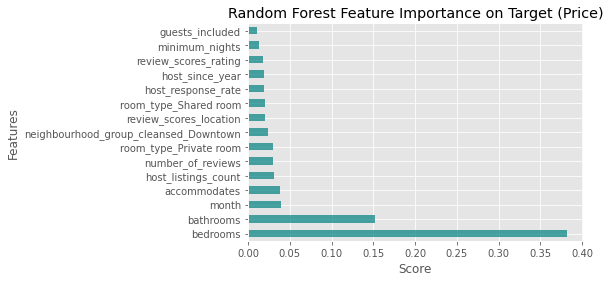

In [33]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', color='teal', alpha=0.7)
plt.title('Random Forest Feature Importance on Target (Price)')
plt.ylabel('Features')
plt.xlabel('Score');

#### Overall, the plot illustrates the top 15 features with respect to importance. However, the RMSE indicates that the model could be improved because there is a large difference between the predicted and observed values. Therefore, we may conduct either (or both) of the following, if necessary, at a future date:

- Some fine tuning (i.e., feature engineering, etc.) 
- Implement additional models to see which one provides a superior fit, if any